# Model SEIR - rozprzestrzenianie mody na nowy telefon
Dawid Stasiak 148112

In [125]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.CompositeModel as gc
import ndlib.models.compartments as cpm
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

%matplotlib inline 

In [126]:
g_dutch = nx.read_edgelist("dutch_college.tsv", 
                    comments="%",
                    delimiter=" ",
                    create_using=nx.DiGraph(),
                    nodetype=int,
                    data=[("weight", int), ("timestamp", int)])

In [127]:
edges_to_remove = [(u, v) for u, v, d in g_dutch.edges(data=True) if d['weight'] == -1]
g_dutch.remove_edges_from(edges_to_remove)

for _, _, d in g_dutch.edges(data=True):
    del d["weight"]
    del d["timestamp"]


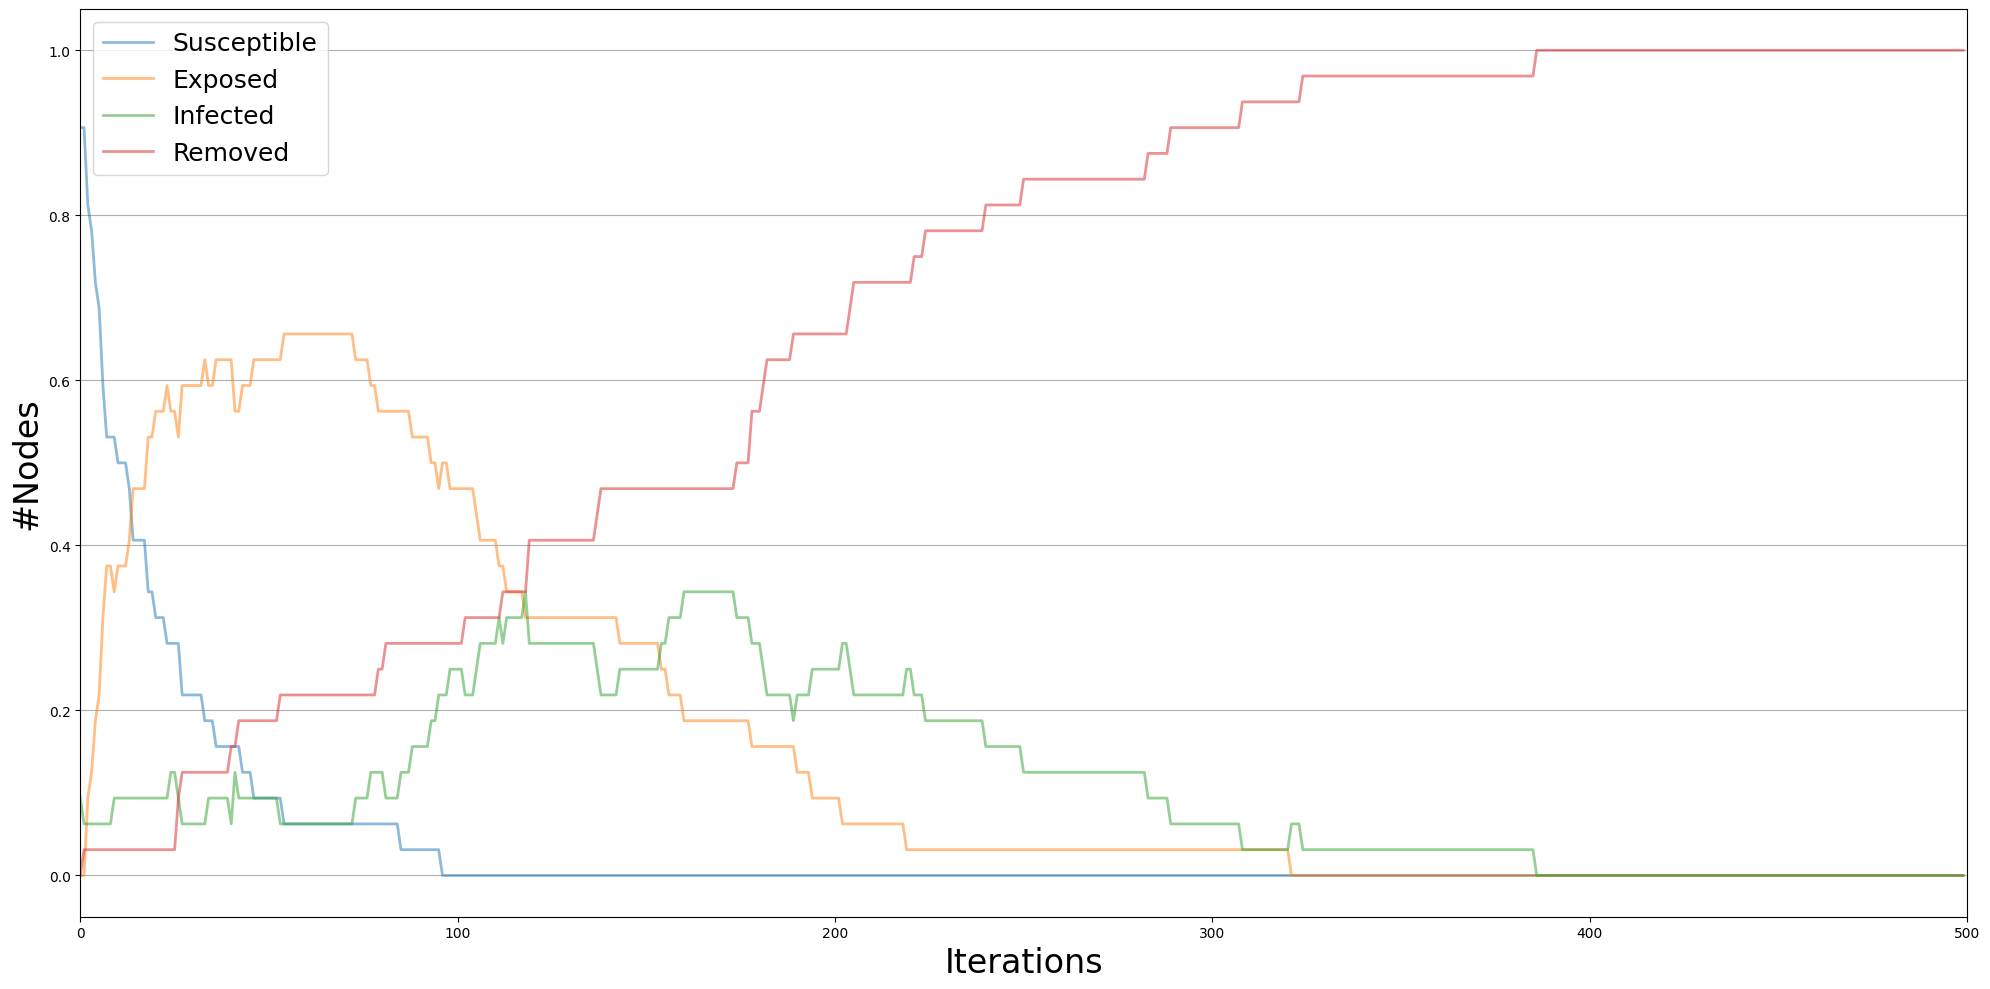

In [128]:
model = gc.CompositeModel(g_dutch)

model.add_status("Susceptible")
model.add_status("Exposed")
model.add_status("Infected")
model.add_status("Removed")

c1 = cpm.NodeStochastic(0.04, triggering_status="Infected") # Susceptible -> Exposed
c2 = cpm.NodeStochastic(0.01) # Exposed -> Infected
c3 = cpm.NodeStochastic(0.02) # Infected -> Removed

model.add_rule("Susceptible", "Exposed", c1)
model.add_rule("Exposed", "Infected", c2)
model.add_rule("Infected", "Removed", c3)

config = mc.Configuration()
config.add_model_parameter("fraction_infected", 0.1)

model.set_initial_status(config)
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()